## Active Learning

Download the titanic dataset here: https://drive.google.com/file/d/0Bz9_0VdXvv9bbVhpOEMwUDJ2elU/view?usp=sharing

In this exercise, we will simulate active learning. We will keep the small sample of observations for testing and we will test how quality of the model rises when we use active learning to choose labeled observations.

In [175]:
# Load the Data into variable df

In [176]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic_dataset.csv')

In [177]:
df = df.replace(['Mlle.','Mme.', 'Ms.', 'Dr.','Major','Lady','Countess.','Jonkheer.','Col.','Rev.','Capt.','Sir','Don'],
               ['Miss','Miss','Miss','Mr','Mr',  'Mrs',  'Mrs',  'Other',  'Other','Other','Mr','Mr','Mr'])

In [178]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [179]:
name = df.Name.tolist()
age = df.Age.tolist()

In [180]:
print(len(age))
print(len(name))

891
891


In [181]:
title = []
names2 = []
for passenger in name:
    if 'Mlle.' in passenger:
        title.append('Miss')
    elif 'Mme.' in passenger:
        title.append('Miss')
    elif 'Ms.' in passenger:
        title.append('Miss')
    elif 'Dr.' in passenger:
        title.append('Mr')
    elif 'Major.' in passenger:
        title.append('Mr')
    elif 'Lady.' in passenger:
        title.append('Mrs')
    elif 'Mrs.' in passenger:
        title.append('Mrs')
    elif 'Mr.' in passenger:
        title.append('Mr')
    elif 'Countess.' in passenger:
        title.append('Mrs')
    elif 'Jonkheer.' in passenger:
        title.append('Mr')
    elif 'Col.' in passenger:
        title.append('Mr')
    elif 'Rev.' in passenger:
        title.append('Mr')
    elif 'Capt.' in passenger:
        title.append('Mr')
    elif 'Sir.' in passenger:
        title.append('Mr')
    elif 'Don' in passenger:
        title.append('Mr')
    elif 'Master' in passenger:
        title.append('Master')
    elif 'Miss' in passenger:
        title.append('Miss')

In [182]:
df['title'] = title
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [183]:
df.groupby('title', as_index=False)['Age'].mean().round()

,title,Age
0,Master,5.0
1,Miss,22.0
2,Mr,33.0
3,Mrs,36.0


In [184]:
df.loc[(df['title'] == 'Master') & (df['Age'].isnull()), 'Age'] = 5
df.loc[(df['title'] == 'Miss') & (df['Age'].isnull()), 'Age'] = 22
df.loc[(df['title'] == 'Mr') & (df['Age'].isnull()), 'Age'] = 33
df.loc[(df['title'] == 'Mrs') & (df['Age'].isnull()), 'Age'] = 36

In [185]:
df = df.replace(['female', 'male'], [0, 1])
df.Age = df.Age.astype('int64')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,Mr


In [186]:
df = df.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title'])

In [187]:
# TEST SAMPLE
# USE THIS SAMPLE ONLY FOR TESTING
test_df = df.sample(n=100, random_state=42)
# KEEP ONLY THOSE WHO ARE NOT IN THE TEST SET
df = df[~df.PassengerId.isin(test_df.PassengerId.tolist())]

In [188]:
# FIT THE FIRST MODEL ONLY ON THE DATAFRAME START_DF
start_df = df.sample(n=100, random_state=42)
# DROP OBS FROM START_DF FROM DF
df = df[~df.PassengerId.isin(start_df.PassengerId.tolist())]

### Tasks

1. fit the first model only on the **start_df** using **SVM** and evaluate accuracy, precision and recall on test_df
2. in each iteration, add 10 observations from **df** to your trainset (choose the observation using active learning approach) 
    - score all observations in df and take 10 where the model isn't sure what class it is. The probability of surviving will be around 50% 
3. refit the model and evaluate on **test_df** again.    
3. the goal is to converge to the optimal solution as fast as possible by choosing **right** observations in each iteration
4. plot the graphs for each eval metric, where on the axis x is iteration number, on y is the metric value for that model

In [189]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [190]:
start_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
288,289,1,2,1,42,0,0
42,43,0,3,1,33,0,0
416,417,1,2,0,34,1,1
329,330,1,1,0,16,0,1
587,588,1,1,1,60,1,1
...,...,...,...,...,...,...,...
10,11,1,3,0,4,1,1
173,174,0,3,1,21,0,0
431,432,1,3,0,36,1,0
592,593,0,3,1,47,0,0


In [201]:
model = SVC(kernel='linear')
model.fit(start_df[['Pclass', 'Sex', 'Age']], start_df['Survived'])

SVC(kernel='linear')

In [202]:
y_pred = model.predict(test_df[['Pclass', 'Sex', 'Age']])

In [239]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(test_df['Survived'], y_pred))
print("Precision: ", metrics.precision_score(test_df['Survived'], y_pred))
print("Recall: ", metrics.recall_score(test_df['Survived'], y_pred))

Accuracy:  0.79
Precision:  0.7435897435897436
Recall:  0.725


In [240]:
iterations = []
for iteration in range(int(len(df)/10)):
    iterations.append(iteration)

In [244]:
data = df.copy()
trainset = start_df.copy()
accuracy = []
precision = []
recall = []
samples = 100

for iteration in range(int(len(df)/10)):
    new_data = df.sample(n=10, random_state=42)
    data = data[~data.PassengerId.isin(new_data.PassengerId.tolist())]
    trainset = pd.concat([trainset, new_data], axis=0)

    score = model.score(trainset[['Pclass', 'Sex', 'Age']], trainset['Survived'])
    
    y_predictions = model.predict(trainset[['Pclass', 'Sex', 'Age']])
    accuracy.append(accuracy_score(trainset['Survived'], y_predictions))
    precision.append(precision_score(trainset['Survived'], y_predictions))
    recall.append(recall_score(trainset['Survived'], y_predictions))

    print(f"Iteration {iteration} score: ", score)

    

Iteration 0 score:  0.7818181818181819
Iteration 1 score:  0.7583333333333333
Iteration 2 score:  0.7384615384615385
Iteration 3 score:  0.7214285714285714
Iteration 4 score:  0.7066666666666667
Iteration 5 score:  0.69375
Iteration 6 score:  0.6823529411764706
Iteration 7 score:  0.6722222222222223
Iteration 8 score:  0.6631578947368421
Iteration 9 score:  0.655
Iteration 10 score:  0.6476190476190476
Iteration 11 score:  0.6409090909090909
Iteration 12 score:  0.6347826086956522
Iteration 13 score:  0.6291666666666667
Iteration 14 score:  0.624
Iteration 15 score:  0.6192307692307693
Iteration 16 score:  0.6148148148148148
Iteration 17 score:  0.6107142857142858
Iteration 18 score:  0.6068965517241379
Iteration 19 score:  0.6033333333333334
Iteration 20 score:  0.6
Iteration 21 score:  0.596875
Iteration 22 score:  0.593939393939394
Iteration 23 score:  0.5911764705882353
Iteration 24 score:  0.5885714285714285
Iteration 25 score:  0.5861111111111111
Iteration 26 score:  0.5837837837

In [245]:
model.fit(test_df[['Pclass', 'Sex', 'Age']], test_df['Survived'])

SVC(kernel='linear')

Text(0, 0.5, 'recall')

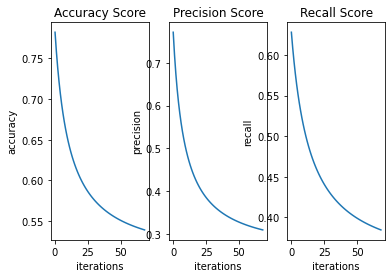

In [249]:
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
plt.plot(iterations, accuracy)
plt.title("Accuracy Score")
plt.xlabel('iterations')
plt.ylabel('accuracy')

plt.subplot(1, 3, 2)
plt.plot(iterations, precision)
plt.title("Precision Score")
plt.xlabel('iterations')
plt.ylabel('precision')

plt.subplot(1, 3, 3)
plt.plot(iterations, recall)
plt.title("Recall Score")
plt.xlabel('iterations')
plt.ylabel('recall')

In [ ]:
bus_list = bus_journey['journeys']                                              # the list of bus options is listed as the value for the key 'journeys'
bus_duration_list = []                                                          # create empty list for the duration of each bus option

for bus_option in bus_list:                                                     # access each bus option in list
    bus_duration = bus_option['duration']                                       # get value for key 'duration' - assign the total duration of each option to a variable
    int_bus_duration = int(bus_duration)                                        # turn total duration of bus option into an integer
    bus_duration_list.append(int_bus_duration)                                  # add total duration of the bus option to the list of durations
    average_bus_duration = sum(bus_duration_list) / len(bus_duration_list)      # find average duration of bus option
    
tube_list = tube_journey['journeys']                                            # the list of tube options is listed as the value for the key 'journeys'
tube_duration_list = []                                                         # create empty list for the duration of each tube option

for tube_option in tube_list:                                                   # access each tube option in list
    tube_duration = tube_option['duration']                                     # get value for key 'duration' - assign the total duration of each option to a variable
    int_tube_duration = int(tube_duration)                                      # turn total duration of tube option into an integer
    tube_duration_list.append(int_tube_duration)                                # add total duration of the tube option to the list of durations
    average_tube_duration = sum(tube_duration_list) / len(tube_duration_list)   # find average duration of tube option

# Print the average duration of both bus and tube options. Determine which one is faster.

if average_bus_duration > average_tube_duration:
    print("Planned duration: \nBus: " + str(int(average_bus_duration)) + " minutes \nTube: " + str(int(average_tube_duration)) + " minutes \nThe journey by tube is faster!")
else:
     print("Planned duration: \nBus: " + str(int(average_bus_duration)) + " minutes \nTube: " + str(int(average_tube_duration)) + " minutes \nThe journey by bus is faster!")